Bitcoin data k mean clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE

%matplotlib inline

In [2]:
# data_in = pd.read_csv("data_in.csv", index_col=False)
# data_in.head()


In [3]:
data_sample = pd.read_csv("data_in_sample.csv", index_col=False)
# data_sample = data_in.sample(100000)
data_sample.head()

,txID,blockID,n_inputs,n_outputs,block_timestamp,n_txs,seq,addrID,sum
0,286344040,501230,3,2,1514360777,2179,1,283256461,244993
1,285318410,500679,1,3,1514028711,2235,0,39848381,202730
2,276973005,497076,1,2,1512155343,2591,0,336365330,1700642
3,281915313,499253,2,2,1513257671,2600,1,65995940,99962500
4,285126052,500594,1,2,1513977525,3065,0,349427300,78098672


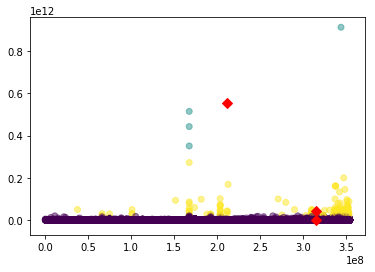

In [4]:
model = KMeans(n_clusters=3, algorithm='auto')
model.fit(data_sample)
predict = pd.DataFrame(model.predict(data_sample))
predict.columns = ['predict']

result = pd.concat([data_sample, predict], axis=1)

centers = pd.DataFrame(model.cluster_centers_, columns=list(data_sample))
center_x = centers['addrID']
center_y = centers['sum']

plt.scatter(result['addrID'], result['sum'], c=result['predict'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()



In [5]:
scaled_data = StandardScaler().fit_transform(data_sample.values.astype(float))
scaled_data = pd.DataFrame(scaled_data, columns=data_sample.columns)
scaled_data.head()

,txID,blockID,n_inputs,n_outputs,block_timestamp,n_txs,seq,addrID,sum
0,1.196866,1.212145,-0.501158,-0.214304,1.250265,-0.048480,-0.420705,-0.493360,-0.062776
1,0.886457,0.832821,-0.513295,-0.184009,0.821091,0.039955,-0.430926,-4.279636,-0.062785
2,-1.639297,-1.647588,-0.513295,-0.214304,-1.600115,0.602147,-0.430926,0.332762,-0.062464
3,-0.143497,-0.148879,-0.507227,-0.214304,-0.175428,0.616359,-0.420705,-3.872904,-0.041399
4,0.828240,0.774304,-0.513295,-0.214304,0.754937,1.350683,-0.430926,0.535945,-0.046086


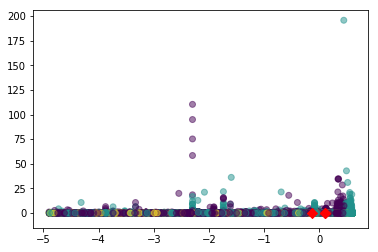

In [6]:
model = KMeans(n_clusters=3, algorithm='auto')
model.fit(scaled_data)
predict = pd.DataFrame(model.predict(scaled_data))
predict.columns = ['predict']

scaled_result = pd.concat([scaled_data, predict], axis=1)

centers = pd.DataFrame(model.cluster_centers_, columns=list(scaled_data))
center_x = centers['addrID']
center_y = centers['sum']

plt.scatter(scaled_result['addrID'], scaled_result['sum'], c=scaled_result['predict'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()


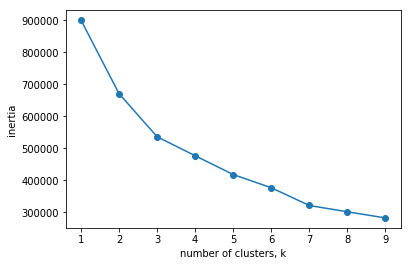

In [7]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


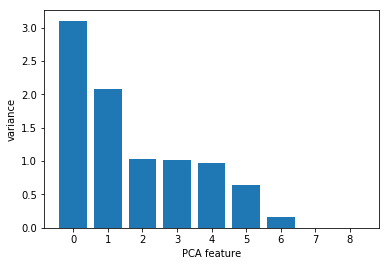

In [8]:
scaler = StandardScaler()
pca = PCA()

pipeline = make_pipeline(scaler, pca)
pipeline.fit(data_sample)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

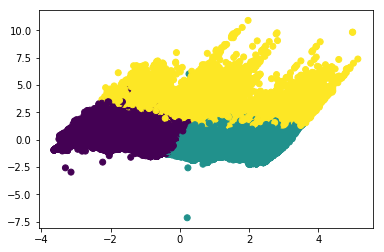

In [9]:
model = PCA(n_components=2)
pca_features = model.fit_transform(scaled_data)

xf = pca_features[:, 0]
yf = pca_features[:, 1]
plt.scatter(xf, yf, c=scaled_result['predict'])
plt.show()